In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.layers.core import Activation
from keras import backend as K

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
print(type(x_train[0]), x_train.shape, y_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28) (60000,)


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

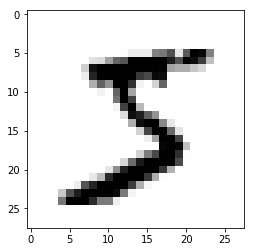

In [7]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

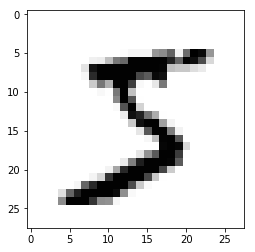

In [8]:
plt.imshow(x_train[0], cmap='Greys')

In [9]:
model = Sequential()

In [10]:
# model.add(Flatten(input_shape=(28,28)))
# model.add(Dense(24,activation='relu'))
# model.add(Dense(8,activation='relu'))
# model.add(Dense(10,activation='softmax'))

In [11]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64,activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(Dense(18,activation='relu'))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.summary()
## check what is param

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 18)                1170      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                190       
Total params: 51,600
Trainable params: 51,600
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=5, batch_size=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 61s 1ms/step - loss: 7.7945 - acc: 0.5118
Epoch 2/5
60000/60000 [==============================] - 59s 982us/step - loss: 4.2432 - acc: 0.7325
Epoch 3/5
60000/60000 [==============================] - 61s 1ms/step - loss: 3.4203 - acc: 0.7848
Epoch 4/5
60000/60000 [==============================] - 59s 983us/step - loss: 3.1953 - acc: 0.7995
Epoch 5/5
60000/60000 [==============================] - 66s 1ms/step - loss: 3.0570 - acc: 0.8083


In [18]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 52us/step


[3.1727018005371095, 0.8013]

In [19]:
predictions = model.predict([x_test])

In [20]:
print(np.argmax(predictions[110]))

8


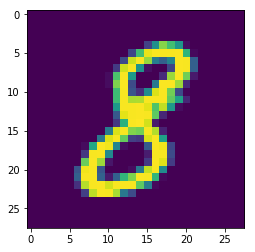

In [22]:
plt.imshow(x_test[110])

In [23]:
model.save('mnist_nn.model')

In [24]:
load_model = keras.models.load_model('mnist_nn.model')

In [27]:
predictions = load_model.predict([x_test])

In [29]:
print(np.argmax(predictions[9]))

9


In [28]:
predictions[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

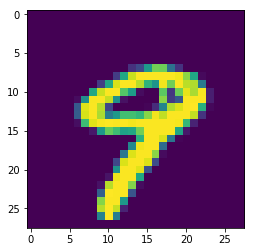

In [30]:
plt.imshow(x_test[9])